<a href="https://colab.research.google.com/github/LipeSilva83/Alura_Store_BR/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [4]:
faturamentos = {
    'loja1': float(sum(loja1['Preço'])),
    'loja2': float(sum(loja2['Preço'])),
    'loja3': float(sum(loja3['Preço'])),
    'loja4': float(sum(loja4['Preço'])),
}

for loja, faturamento in faturamentos.items():
    print(f'{loja}: {faturamento:.2f}')



loja1: 1534509.12
loja2: 1488459.06
loja3: 1464025.03
loja4: 1384497.58


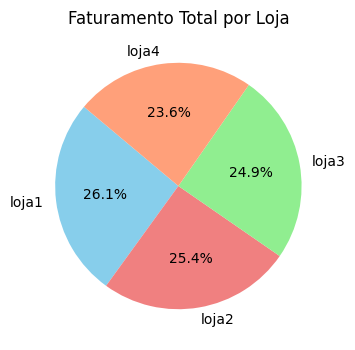

In [7]:
import matplotlib.pyplot as plt

faturamentos = {
    'loja1': 1534509.12,
    'loja2': 1488459.06,
    'loja3': 1464025.03,
    'loja4': 1384497.58,
}

nomes_lojas = list(faturamentos.keys())
valores_faturamento = list(faturamentos.values())
cores = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']

plt.figure(figsize=(8, 4))
plt.pie(valores_faturamento, labels=nomes_lojas, autopct='%1.1f%%', startangle=140, colors=cores)

plt.title('Faturamento Total por Loja')

plt.show()

In [8]:
maior_faturamento_loja = max(faturamentos.items(), key=lambda x: x[1])
maior_faturamento = maior_faturamento_loja[1]
nome_da_loja = maior_faturamento_loja[0]
print(f'Maior faturamento foi de: {maior_faturamento:.2f} da {nome_da_loja}')

Maior faturamento foi de: 1534509.12 da loja1


In [9]:
menor_faturamento_loja = min(faturamentos.items(), key=lambda x: x[1])
menor_faturamento = menor_faturamento_loja[1]
nome_da_loja = menor_faturamento_loja[0]
print(f'Menor faturamento foi de: {menor_faturamento:.2f} da {nome_da_loja}')

Menor faturamento foi de: 1384497.58 da loja4


# 2. Vendas por Categoria


In [10]:
vendas_por_categoria1 = loja1.groupby('Categoria do Produto')['Preço'].sum()
print(vendas_por_categoria1)

Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64


In [11]:
vendas_por_categoria2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
print(vendas_por_categoria2)

Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64


In [12]:
vendas_por_categoria3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
print(vendas_por_categoria2)

Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64


In [13]:
vendas_por_categoria4 = loja4.groupby('Categoria do Produto')['Preço'].sum()
print(vendas_por_categoria2)

Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64


# 3. Média de Avaliação das Lojas

In [14]:
media_aval_loja1 = (sum(loja1['Avaliação da compra'])) / len(loja1['Avaliação da compra'])
print(f'A média de avaliação da loja 1 é: {media_aval_loja1:.2f}')

A média de avaliação da loja 1 é: 3.98


In [15]:
media_aval_loja2 = (sum(loja2['Avaliação da compra'])) / len(loja2['Avaliação da compra'])
print(f'A média de avaliação da loja 2 é: {media_aval_loja2:.2f}')

A média de avaliação da loja 2 é: 4.04


In [16]:
media_aval_loja3 = (sum(loja3['Avaliação da compra'])) / len(loja3['Avaliação da compra'])
print(f'A média de avaliação da loja 3 é: {media_aval_loja3:.2f}')

A média de avaliação da loja 3 é: 4.05


In [17]:
media_aval_loja4 = (sum(loja4['Avaliação da compra'])) / len(loja4['Avaliação da compra'])
print(f'A média de avaliação da loja 4 é: {media_aval_loja4:.2f}')

A média de avaliação da loja 4 é: 4.00


In [18]:
lista_medias = [media_aval_loja1, media_aval_loja2, media_aval_loja3, media_aval_loja4]
lista_lojas = ['loja1', 'loja2', 'loja3', 'loja4']
print(lista_lojas)
print([f'{media:.2f}' for media in lista_medias])

['loja1', 'loja2', 'loja3', 'loja4']
['3.98', '4.04', '4.05', '4.00']


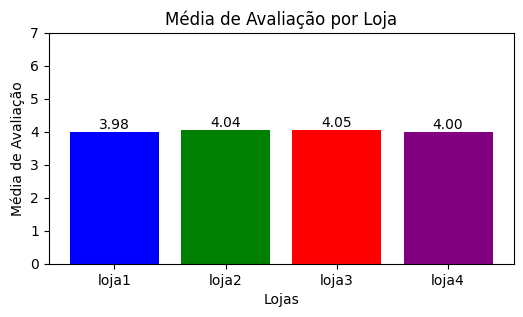

In [21]:
lista_medias = [media_aval_loja1, media_aval_loja2, media_aval_loja3, media_aval_loja4]
lista_lojas = ['loja1', 'loja2', 'loja3', 'loja4']

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.bar(lista_lojas, lista_medias, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação por Loja')
plt.ylim(0, 7)

for i, media in enumerate(lista_medias):
    plt.text(i, media + 0.1, f'{media:.2f}', ha='center')

plt.show()

# 4. Produtos Mais e Menos Vendidos

Função para calcular a venda por categoria

In [20]:
def analisar_vendas(vendas_por_categoria, nome_loja):
   """
    Analisa as vendas por categoria de uma loja para encontrar o produto mais e menos vendido.

    Args:
        vendas_por_categoria (dict): Um dicionário onde as chaves são os nomes dos produtos
                                     e os valores são as quantidades vendidas.
        nome_loja (str): O nome da loja para identificar na saída.

    Returns:
        tuple: Uma tupla contendo duas tuplas:
               - A primeira tupla com o produto mais vendido e sua quantidade.
               - A segunda tupla com o produto menos vendido e sua quantidade.
    """

   if vendas_por_categoria.empty:
    print(f"Não há dados de vendas para a {nome_loja}.")
    return None, None

   mais_vendido = max(vendas_por_categoria.items(), key=lambda x: x[1])
   produto_mais_vendido = mais_vendido[0]
   quantidade_mais_vendida = mais_vendido[1]

   menos_vendido = min(vendas_por_categoria.items(), key=lambda x: x[1])
   produto_menos_vendido = menos_vendido[0]
   quantidade_menos_vendida = menos_vendido[1]

   print(f'O produto mais vendido da {nome_loja} foi: {produto_mais_vendido} na quantidade de: {quantidade_mais_vendida:.0f}')
   print(f'O produto menos vendido da {nome_loja} foi: {produto_menos_vendido} na quantidade de: {quantidade_menos_vendida:.0f}')

   return (produto_mais_vendido, quantidade_mais_vendida), (produto_menos_vendido, quantidade_menos_vendida)

*LOJA 1*

In [22]:
resultado_loja1 = analisar_vendas(vendas_por_categoria1, 'loja1')


O produto mais vendido da loja1 foi: eletronicos na quantidade de: 572659
O produto menos vendido da loja1 foi: livros na quantidade de: 11714


*LOJA 2*

In [23]:
resultado_loja2 = analisar_vendas(vendas_por_categoria2, 'loja2')


O produto mais vendido da loja2 foi: eletronicos na quantidade de: 547774
O produto menos vendido da loja2 foi: livros na quantidade de: 13454


*LOJA 3*

In [24]:
resultado_loja3 = analisar_vendas(vendas_por_categoria3, 'loja3')


O produto mais vendido da loja3 foi: eletronicos na quantidade de: 547700
O produto menos vendido da loja3 foi: livros na quantidade de: 12665


*LOJA 4*

In [25]:
resultado_loja4 = analisar_vendas(vendas_por_categoria4, 'loja4')

O produto mais vendido da loja4 foi: eletronicos na quantidade de: 545967
O produto menos vendido da loja4 foi: livros na quantidade de: 12428


# 5. Frete Médio por Loja


In [26]:
def analisar_frete(dados_frete, nome_da_loja):
  """
  Calcula e imprime a média do frete para uma loja.

  Args:
      dados_frete (pandas.Series or list): Dados do frete (a coluna 'Frete' de um DataFrame).
      nome_da_loja (str): O nome da loja para identificação na saída.

  Returns:
      float: A média calculada do frete.
  """

  if len(dados_frete) == 0:
    print(f"Não há dados de frete para a {nome_da_loja}.")
    return 0.0

  media_frete_loja = sum(dados_frete) / len(dados_frete)
  print(f'A média do frete da {nome_da_loja} é: {media_frete_loja:.2f}')
  return media_frete_loja


In [27]:
frete1 = analisar_frete(loja1['Frete'], 'loja1')
print(frete1)

A média do frete da loja1 é: 34.69
34.6918049155114


In [28]:
frete2 = analisar_frete(loja2['Frete'], 'loja2')

A média do frete da loja2 é: 33.62


In [29]:
frete3 = analisar_frete(loja3['Frete'], 'loja3')

A média do frete da loja3 é: 33.07


In [30]:
frete4 = analisar_frete(loja4['Frete'], 'loja4')

A média do frete da loja4 é: 31.28


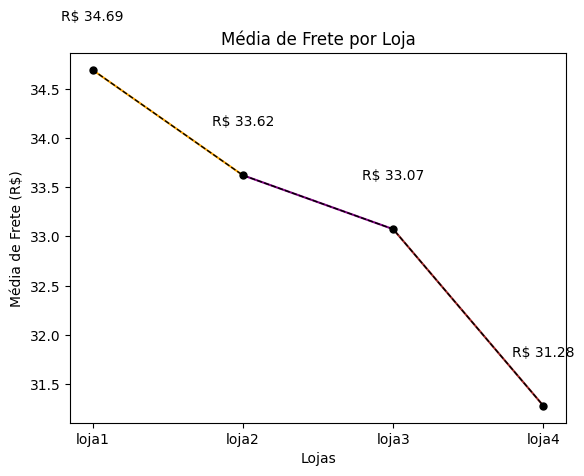

In [ ]:

import matplotlib.pyplot as plt
medias_frete = [frete1, frete2, frete3, frete4]
nomes_lojas_frete = ['loja1', 'loja2', 'loja3', 'loja4']


for i in range(len(medias_frete) - 1):
    plt.plot(nomes_lojas_frete[i:i + 2], medias_frete[i:i + 2], color=colors[i])

plt.plot(nomes_lojas_frete, medias_frete, color= 'black', linestyle='--', linewidth=1, marker='o', markersize=5, markerfacecolor='black', markeredgecolor='black', markeredgewidth=1)  
plt.xlabel('Lojas')
plt.ylabel('Média de Frete (R$)')
plt.title('Média de Frete por Loja')

for i, media in enumerate(medias_frete):
    plt.text(i, media + 0.5, f'R$ {media:.2f}', ha='center')

plt.show()